<a href="https://colab.research.google.com/github/samiuddinahmedmeenam/pancard-tampering/blob/main/planddiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive"

'161e7b71-ee3c-438b-a24d-384789d667f6 (1).docx'
'161e7b71-ee3c-438b-a24d-384789d667f6 (2).docx'
 161e7b71-ee3c-438b-a24d-384789d667f6.docx
'20101341_ShadmanRahmanSameen_CSE110_Assignment1 (1).ipynb'
 20241204_183048.mp4
 20241204_185107.mp4
 3_2021_12_Paladin_Chess_Set
 3d
'AFFIDAVIT '
 alt_black_pawn.stl
 alt_white_pawn.stl
 black_bishop.stl
'black_king (1).stl'
'black_knight (1).stl'
 Black_queen.stl
 black_tower.stl
 Book1.xlsx
 Classroom
'Colab Notebooks'
'contact form.gsheet'
'Copy of 20230415_150625.mp4'
'Copy of SamiuddinResume.gdoc'
'CV of ABM Ruhul Amin Howlader.docx'
 DOC-20221003-WA0000..pdf
 Dwarf_Bishop.stl
 Dwarf_Horse.stl
 Dwarf_King.stl
 Dwarf_Pawn.stl
 Dwarf_Queen.stl
 Dwarf_Tower.stl
'Essential Calculus Early Transcendentals, 2nd (James Stewart) (z-lib.org) (1).gdoc'
'Essential Calculus Early Transcendentals, 2nd (James Stewart) (z-lib.org).gdoc'
 Evaluation.gdoc
'Fappi 16, 22.docx'
'Farha Fiza Binte Amin.docx'
 findingVmatrix.mp4
 GaniboevResume.gdoc
'Getting started

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical


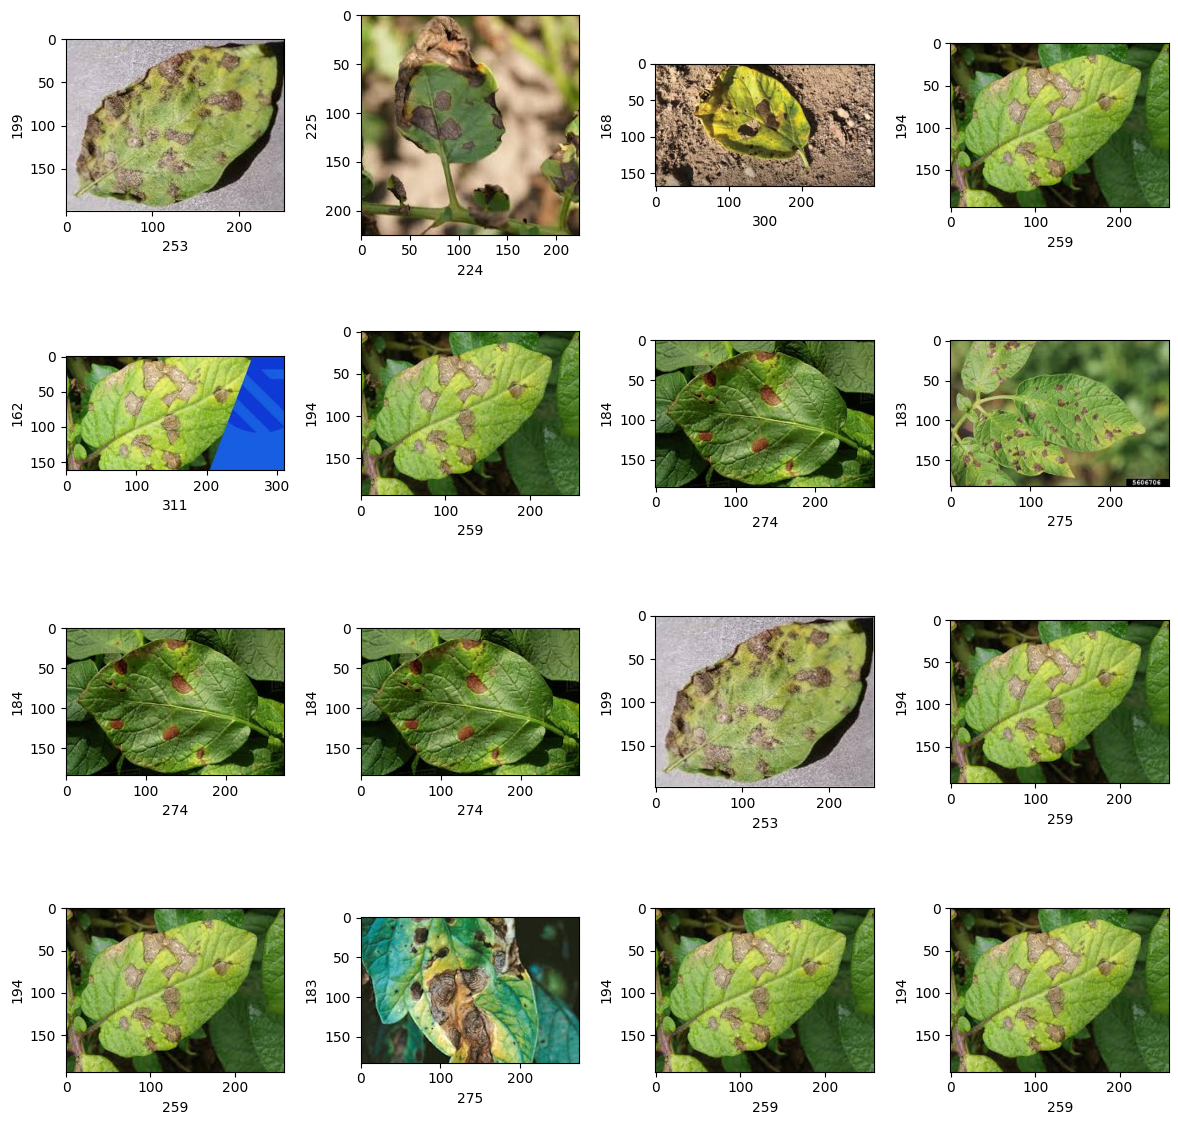

In [6]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Plant_images/Potato_Early_blight"

for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path + "/" + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [7]:
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256, 256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [8]:
dir = "/content/drive/My Drive/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0, 1, 2]
temp = -1

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [9]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
2,10
0,9
1,9


In [10]:
image_list[0].shape

(256, 256, 3)

In [11]:
label_list = np.array(label_list)
label_list.shape

(28,)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [13]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0

x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)


In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,225,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,244,995 (27.64 MB)

 Trainable params: 7,244,995 (27.64 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=["accuracy"])

In [17]:
x_train, x_val, y_trai, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [18]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_trai, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2353 - loss: 1.1405 - val_accuracy: 0.0000e+00 - val_loss: 1.9521
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4706 - loss: 1.1657 - val_accuracy: 0.0000e+00 - val_loss: 1.8563
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4706 - loss: 1.0576 - val_accuracy: 0.0000e+00 - val_loss: 1.5132
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7647 - loss: 0.9840 - val_accuracy: 0.0000e+00 - val_loss: 1.2175
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4706 - loss: 0.9518 - val_accuracy: 0.0000e+00 - val_loss: 1.1642
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5294 - loss: 0.9251 - val_accuracy: 0.0000e+00 - val_loss: 1.2461
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5294 - loss: 0.8747 - val_accuracy: 0.0000e+00 - val_loss: 1.3962
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7059 - loss: 0.8285 - val_accuracy: 0.0000e+00 - v

In [19]:
# Save the full model (recommended format)
model.save("/content/drive/My Drive/plant_disease.keras")

# Save model architecture as JSON separately
json_model = model.to_json()
with open("/content/drive/My Drive/plant_disease.json", "w") as json_file:
    json_file.write(json_model)

# Save model weights separately if needed
model.save_weights("/content/drive/My Drive/plant_model_weights.weights.h5")


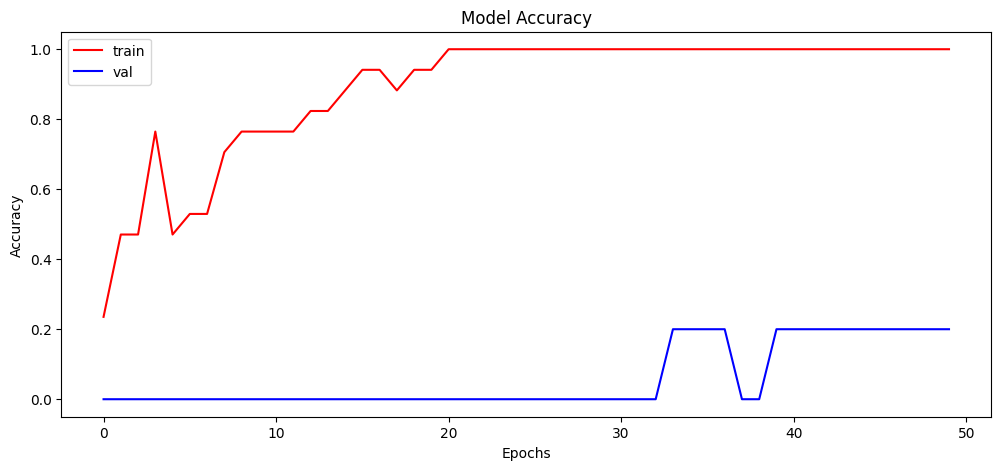

In [20]:
plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [21]:
print("[INFO] calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] calculating model accuracy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3333 - loss: 1.1991
Test Accuracy: 33.33333432674408


In [22]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


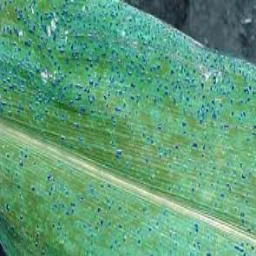

In [24]:
img = array_to_img(x_test[0])
img

In [27]:
print("Originally : ", all_labels[np.argmax(y_test[1])])
print("Predicted : ", all_labels[np.argmax(y_pred[1])])

Originally :  Tomato-Bacterial_spot
Predicted :  Potato-Early_blight
